## Introduction au TP : Développement d’un Perceptron

Dans cette partie, nous allons implémenter étape par étape notre **premier neurone artificiel**, en appliquant les équations étudiées dans le cours précedent.  
L’objectif est de construire un perceptron capable de séparer deux types d’observations à partir de données simples.

---

## Dataset utilisé

Nous partons d’un dataset `(X, y)` constitué de :

- **200 lignes**  
- **2 colonnes** représentant deux caractéristiques mesurées sur des plantes  
  - *exemple : longueur et largeur des feuilles*

La variable cible `y` indique si la plante est :
- **toxique**  
- **non toxique**



![alt text](images/dataset.png)
Notre but sera d’entraîner un **neurone artificiel** afin qu’il apprenne à distinguer automatiquement ces deux classes à partir des valeurs d’entrée.

---

## Objectif du TP

- Charger le dataset  
- Implémenter les équations du perceptron (somme pondérée, fonction d'activation, mise à jour des poids)  

![alt text](images/Equations_Perceptron.png)


- Entraîner le modèle sur les données  
- Visualiser la frontière de décision obtenue

Ce TP constitue la première étape vers la construction d’un réseau de neurones plus complet et vers la compréhension concrète du Deep Learning.


## Architecture du code du perceptron

Pour implémenter notre neurone artificiel, nous allons organiser le code autour de **cinq fonctions principales** qui seront appelées en boucle dans un algorithme de descente de gradient.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimmensionde X: (100, 2)
dimmensionde y: (100, 1)


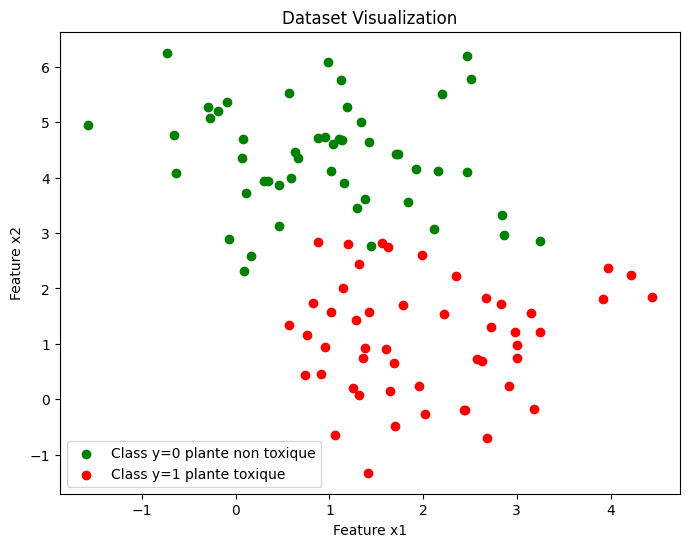

In [87]:
#make_blobs est une utilité pratique pour générer des jeux de données synthétiques en forme de nuages (clusters) gaussiens
#X est un tableau NumPy de forme (n_samples, n_features) contenant les points générés.
#y est un tableau d'étiquettes entières de forme (n_samples,) indiquant à quel cluster appartient chaque point.

X, y =make_blobs(n_samples=100, n_features=2, centers=2, random_state=0) #generating a simple dataset with 2 classes

y=y.reshape((y.shape[0],1))  #reshaping y to be a column vector

print('dimmensionde X:' , X.shape)
print('dimmensionde y:' , y.shape)

#visualizing the dataset point rouge y=1 et point vert y=0
plt.figure(figsize=(8,6))
plt.title("Dataset Visualization")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.scatter(X[y[:,0]==0][:,0], X[y[:,0]==0][:,1], color='green', label='Class y=0 plante non toxique')
plt.scatter(X[y[:,0]==1][:,0], X[y[:,0]==1][:,1], color='red', label='Class y=1 plante toxique')
plt.legend()
plt.show()



In [25]:
print(X.shape[0])  #number of training examples
print(X.shape[1])  #number of features

100
2


### Fonction n'itialisation

In [18]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)  #weights initialization
    b = np.random.randn(1)              #bias initialization
    return (W, b)


In [20]:
W, b = initialisation(X)
print("W:", W)
print("b:", b)
print (W.shape)
print (b.shape)

W: [[-0.68637576]
 [ 0.00458971]]
b: [0.10467018]
(2, 1)
(1,)


### Implémentation du model
Vecteur Z : Produit matricielle entre x et W plus le paramètre b 

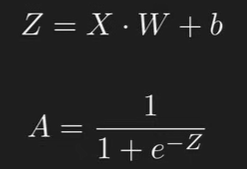

In [27]:
def model(X, W, b):
    Z = np.dot(X, W) + b  #linear combination
    A = 1/(1 + np.exp(-Z))  #sigmoid activation
    return A

In [ ]:
#Test the model function
A = model(X, W, b)
print ('dimension du A : ', A.shape)
print(A)


### Implémentation de la fonction log-loss

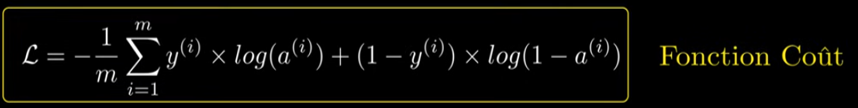

In [34]:
def log_loss(A,y):
    m = y.shape[0]  #number of examples
    loss = - (1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  #log loss computation
    return loss

In [35]:
#test the log_loss function
log = log_loss(A, y)
print("Log Loss:", log)

Log Loss: 1.0443834297165495


### Fonction des gradients

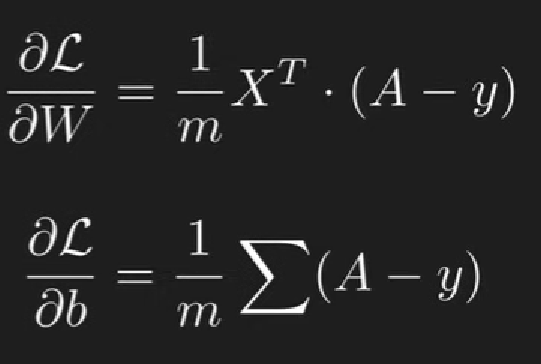



In [50]:
def gradients(A, X, y):
    m = y.shape[0]  #number of examples
    dZ = A - y  #derivative of loss with respect to Z
    dW = (1/m) * np.dot(X.T, dZ)  #derivative of loss with respect to W
    db = (1/m) * np.sum(dZ)        #derivative of loss with respect to b
    return (dW, db)


In [43]:
#Etest gradients function   
dw, db = gradients(A, X, y)
print("dimension de dw", dw.shape)
print( "dW:", dw)
print("db:", db)    

dimension de dw (2, 1)
dW: [[-0.72529644]
 [ 0.42714176]]
db: -0.1898734131726051


### Mise à jour paramétres W

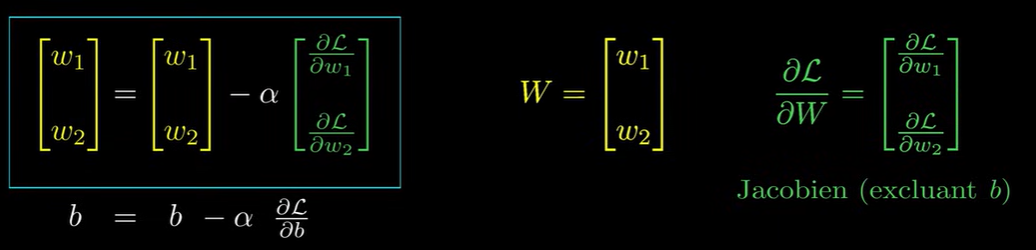

In [56]:
def update(dw, db,W,b, learning_rate):
    W = W - learning_rate * dw  #weights update
    b = b - learning_rate * db  #bias update
    return (W, b)

### Implémentation de l'agorithme d'apprentissage

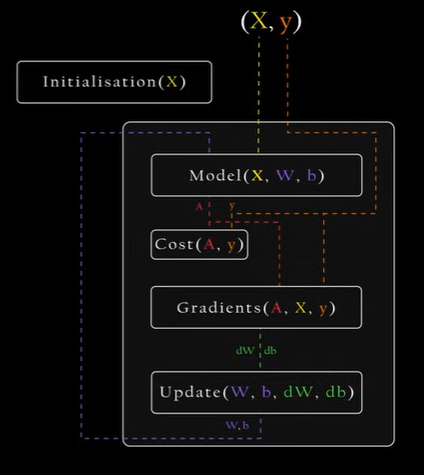

In [88]:
def artificial_neuron(X, y, learning_rate=0.1, num_iterations=100):
   
    W, b = initialisation(X)  #initialize weights and bias

    Loss_history = [] #to store loss values
    
    for i in range(num_iterations):
        A = model(X, W, b)  #forward propagation
        Loss_history.append(log_loss(A, y))  #compute and store loss
        dw, db = gradients(A, X, y)  #backward propagation
        W, b = update(dw, db, W, b, learning_rate)  #update parameters
        if i % 10 == 0:
            print(f"Iteration {i}, Loss: {Loss_history[-1]}")
    
    plt.plot(Loss_history)
    plt.xlabel('Iterations')
    plt.ylabel('Log Loss')
    plt.show()

    return W, b

Iteration 0, Loss: 2.6679435624907506
Iteration 10, Loss: 1.3299195553240895
Iteration 20, Loss: 0.6816367537602902
Iteration 30, Loss: 0.4407106417829514
Iteration 40, Loss: 0.3523587894985494
Iteration 50, Loss: 0.30970982987083195
Iteration 60, Loss: 0.2848201856255886
Iteration 70, Loss: 0.26846329411996883
Iteration 80, Loss: 0.2568240833707023
Iteration 90, Loss: 0.2480576957794783
Iteration 100, Loss: 0.24116732386628845
Iteration 110, Loss: 0.2355684013254902
Iteration 120, Loss: 0.23089593350239124
Iteration 130, Loss: 0.2269104732680867
Iteration 140, Loss: 0.2234485364579658
Iteration 150, Loss: 0.22039476907831732
Iteration 160, Loss: 0.21766550232339044
Iteration 170, Loss: 0.21519861062855555
Iteration 180, Loss: 0.2129470254268899
Iteration 190, Loss: 0.2108744554023363
Iteration 200, Loss: 0.20895248510927417
Iteration 210, Loss: 0.20715856081500178
Iteration 220, Loss: 0.20547456266055633
Iteration 230, Loss: 0.20388577342995298
Iteration 240, Loss: 0.2023801212397065


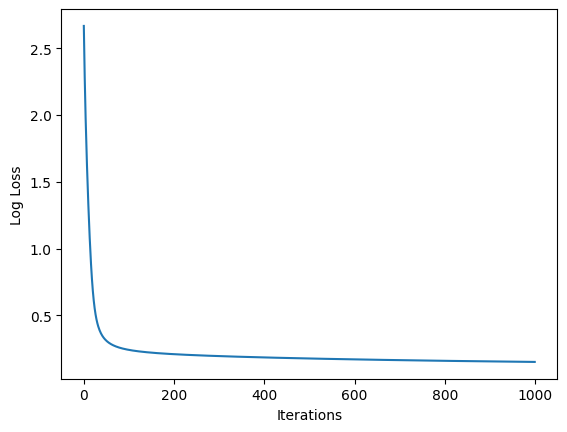

In [63]:
W, b= artificial_neuron(X, y, learning_rate=0.1, num_iterations=1000)

### Effectuer de futures prédictions

Maintenant que nous avons un modèle nous pouvons nous en servir pour effectuer des prédictions


![alt text](images/Sig.png)                           

Si la probabilité est > 0.5 la Plante est considérée Toxique y=1, non Toxique si non y=0

In [92]:
def predict(X, W, b, threshold=0.5):
    A = model(X, W, b)  #compute probabilities
    predictions = (A >= threshold).astype(int)  #convert probabilities to binary predictions
    return predictions

In [101]:
#Example of using the model function 
# plante avec x1=3 et x2=1
new_plant = np.array([[3, 1]])  # shape (1, 2)

predictions = predict(new_plant, W, b)
pront("Predictions for (3,1):", predictions)


Predictions: [[1]]


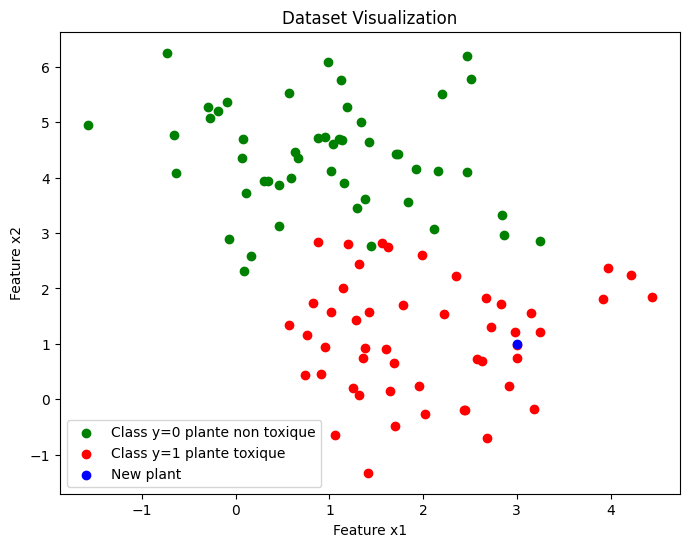

In [102]:
#visualizing the dataset point rouge y=1 et point vert y=0 et la nouvelle plante
plt.figure(figsize=(8,6))
plt.title("Dataset Visualization")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.scatter(X[y[:,0]==0][:,0], X[y[:,0]==0][:,1], color='green', label='Class y=0 plante non toxique')
plt.scatter(X[y[:,0]==1][:,0], X[y[:,0]==1][:,1], color='red', label='Class y=1 plante toxique')
plt.scatter(new_plant[:,0], new_plant[:,1], color='blue', label='New plant')
plt.legend()
plt.show()

### Précision du modèle
utilsant accuracy du package sklearn

In [100]:
from sklearn.metrics import accuracy_score
y_pred = predict(X, W, b)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.92


### Frontière de décision

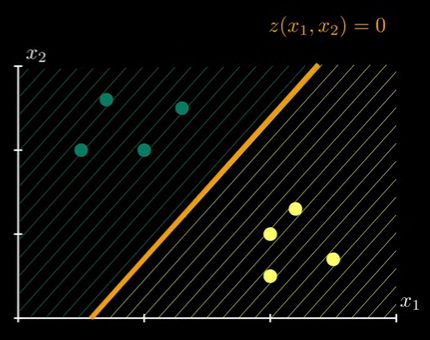   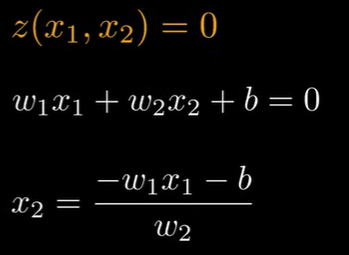

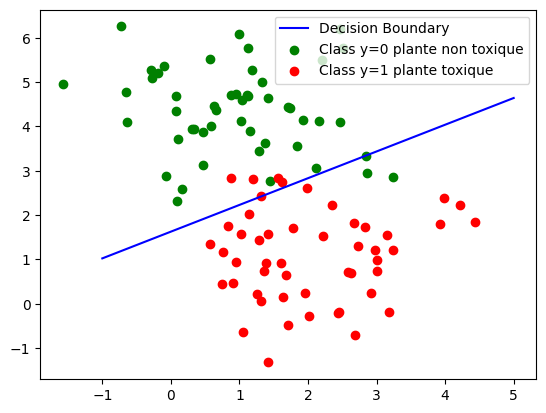

In [104]:
#Dessiner la frontiere de decision
x0=np.linspace(-1, 5, 100) #range for x1
x1= -(W[0]*x0 + b)/W[1] #calculating the corresponding x2 values for the decision boundary
plt.plot(x0, x1, color='blue', label='Decision Boundary')
plt.scatter(X[y[:,0]==0][:,0], X[y[:,0]==0][:,1], color='green', label='Class y=0 plante non toxique')
plt.scatter(X[y[:,0]==1][:,0], X[y[:,0]==1][:,1], color='red', label='Class y=1 plante toxique')
plt.legend()
plt.show()

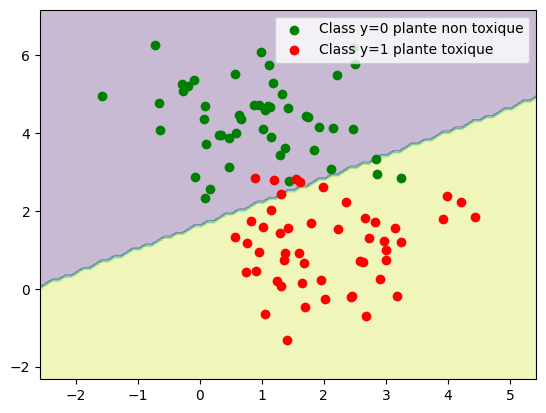

In [103]:
#Dessiner la frontiere de decision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #defining the range for x1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #defining the range for x2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)) #creating a grid of points
grid_points = np.c_[xx.ravel(), yy.ravel()] #reshaping the grid points for prediction
Z = predict(grid_points, W, b) #predicting the class for each point in the grid
Z = Z.reshape(xx.shape) #reshaping the predictions to match the grid shape
plt.contourf(xx, yy, Z, alpha=0.3)      #plotting the decision boundary
plt.scatter(X[y[:,0]==0][:,0], X[y[:,0]==0][:,1], color='green', label='Class y=0 plante non toxique')
plt.scatter(X[y[:,0]==1][:,0], X[y[:,0]==1][:,1], color='red', label='Class y=1 plante toxique')
plt.legend()
plt.show()

In [113]:
import plotly.graph_objects as go

In [117]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [118]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()
